In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the data
df = pd.read_csv('/Users/chiaraferrara/Desktop/Unipi/Magistrale/DM 2/dm2_imdb/imdb.csv')

# Preprocessing

In [3]:
df.replace('\\N', np.nan, inplace=True)

In [4]:
df['totalMedia'] = df['totalVideos'] + df['totalImages'] + df['quotesTotal']  
df['totalMedia']

0          2
1          2
2          1
3          3
4         12
          ..
149526     0
149527     5
149528     5
149529     1
149530     3
Name: totalMedia, Length: 149531, dtype: int64

In [6]:
df.drop(['totalVideos', 'totalImages', 'totalCredits'], axis=1, inplace=True)

In [7]:
df.drop(['endYear'], axis=1, inplace=True)

In [8]:
df.drop(['originalTitle', 'numVotes', 'worstRating', 'bestRating', 'isRatable', ], axis=1, inplace=True)

In [9]:
df['totalNominations'] = df['awardWins'] + df['awardNominationsExcludeWins']
df.drop(['awardWins', 'awardNominationsExcludeWins'], axis=1, inplace=True)

In [10]:
# df['runtimeMinutes'] = df.groupby('titleType')['runtimeMinutes'].transform(
#     lambda x: x.fillna(x.median() if pd.api.types.is_numeric_dtype(x) and not x.median() is np.nan else 0)
# )


# #DUBBIO SU DATA LEAKAGE 

In [11]:
df.drop(['rating'], axis=1, inplace=True)

In [12]:
df['totalReviews'] = df['criticReviewsTotal'] + df['userReviewsTotal']
df.drop(['criticReviewsTotal', 'userReviewsTotal'], axis=1, inplace=True)

In [13]:
df.drop(['castNumber'], axis=1, inplace=True)

In [14]:
df.drop(['isAdult', 'ratingCount'], axis=1, inplace=True)

# Outlier Detection

In [15]:
df.isna().sum() 

startYear               0
runtimeMinutes      40195
titleType               0
canHaveEpisodes         0
numRegions              0
countryOfOrigin     39987
genres               2691
companiesNumber         0
averageRating           0
regions                 0
externalLinks           0
writerCredits           0
directorsCredits        0
soundMixes              0
quotesTotal             0
totalMedia              0
totalNominations        0
totalReviews            0
dtype: int64

In [16]:
# Drop for the moment countryOfOrigin and genres
df.drop(['countryOfOrigin', 'genres'], axis=1, inplace=True)


In [17]:
#Remove all missimg values
df.dropna(inplace=True)


In [18]:
df.head()

,startYear,runtimeMinutes,titleType,canHaveEpisodes,numRegions,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,totalMedia,totalNominations,totalReviews
0,1894,1,short,False,7,3,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",9,0,1,['silent'],0,2,0,19
1,1892,12,short,False,6,0,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",3,0,1,['silent'],0,2,0,1
2,1894,1,short,False,5,1,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",4,0,1,['silent'],0,1,0,0
3,1894,1,short,False,6,6,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",6,0,1,['silent'],0,3,1,22
4,1896,1,short,False,21,5,7.4,"['\\N', 'HU', 'DE', 'TR', 'FI', 'FR', 'IT', 'E...",21,0,2,['silent'],0,12,0,82


In [19]:
#X.head()

In [20]:
from pyod.models.abod import ABOD
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# only numeric columns
X = df.select_dtypes(include=[np.number])

# normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# creating the ABOD model
abod = ABOD(n_neighbors=50, method="fast", contamination=0.01)  
abod.fit(X_scaled)

outliers = abod.predict(X_scaled)
np.unique(outliers, return_counts=True)

# # obtaining the scores
# scores = abod.decision_function(X_scaled)  # Lower → more anomalous
# threshold = np.percentile(scores, 1)  # 1% threshold for outliers
# outliers = scores < threshold  # Boolean array of outliers

# # adding results to the df
# df["ABOD_Score"] = scores
# df["Outlier"] = outliers

# # visualizing the results
# print(df[["ABOD_Score", "Outlier"]].sort_values(by="ABOD_Score").head(10))

# # reduce dimensionality for scatter plot
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)

# # scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap="coolwarm", alpha=0.5)
# plt.xlabel("Principal Component 1")
# plt.ylabel("Principal Component 2")
# plt.title("ABOD Outlier Detection")
# plt.legend(["Inliers", "Outliers"], loc="best")
# plt.show()


KeyboardInterrupt: 

In [ ]:
outliers.__contains__(True)

True

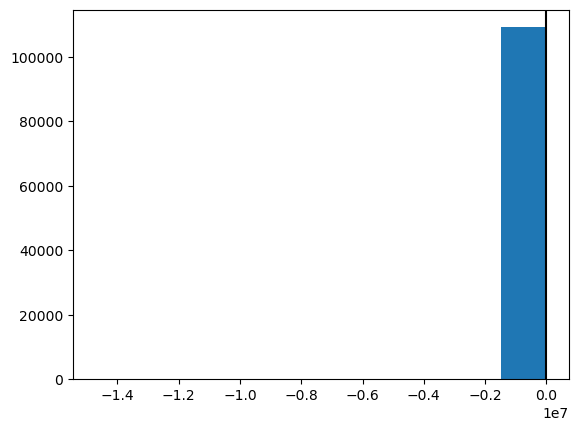

In [ ]:
plt.hist(abod.decision_scores_, bins=10)
plt.axvline(np.min(abod.decision_scores_[np.where(outliers==1)]), c='k')
plt.show()

          ABOD_Score  Outlier
63394  -1.620072e+07     True
130317 -1.609470e+07     True
64685  -1.207600e+07     True
64111  -1.105693e+07     True
44395  -8.529708e+06     True
44399  -8.529708e+06     True
44391  -8.529708e+06     True
43644  -8.149295e+06     True
63666  -8.149295e+06     True
135256 -7.819458e+06     True


/var/folders/gv/llgn_fqn7d1fy23dylt643b80000gn/T/ipykernel_63008/3668866226.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap="coolwarm", alpha=0.5)


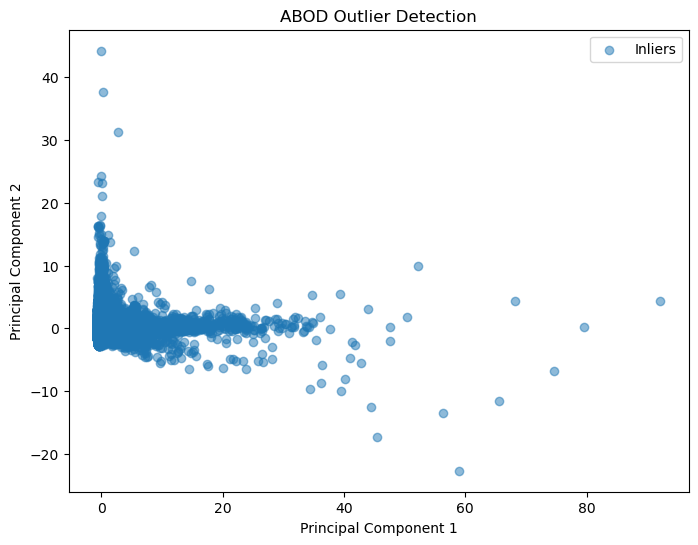

In [ ]:
# obtaining the scores
scores = abod.decision_function(X_scaled)  # Lower → more anomalous
threshold = np.percentile(scores, 1)  # 1% threshold for outliers
outliers = scores < threshold  # Boolean array of outliers

# adding results to the df
df["ABOD_Score"] = scores
df["Outlier"] = outliers

# visualizing the results
print(df[["ABOD_Score", "Outlier"]].sort_values(by="ABOD_Score").head(10))

# reduce dimensionality for scatter plot
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap="coolwarm", alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("ABOD Outlier Detection")
plt.legend(["Inliers", "Outliers"], loc="best")
plt.show()

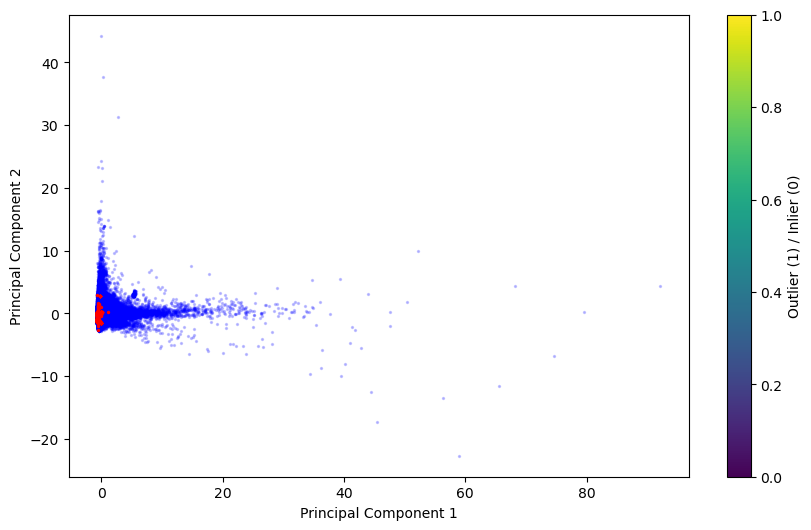

In [ ]:
plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=outliers, cmap="coolwarm", alpha=0.1, s=2)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.scatter(X_pca[~outliers, 0], X_pca[~outliers, 1], c='blue', alpha=0.2, s=2, label="Inliers")
plt.scatter(X_pca[outliers, 0], X_pca[outliers, 1], c='red', alpha=1, s=2, label="Outliers")
#plt.legend()
plt.colorbar(label="Outlier (1) / Inlier (0)")
plt.show()

In [ ]:
outliers_list = df[df['Outlier'] == True]
display(outliers_list)

,startYear,runtimeMinutes,titleType,canHaveEpisodes,numRegions,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal,totalMedia,totalNominations,totalReviews,ABOD_Score,Outlier
8391,1971,60,tvSeries,True,1,1,7.2,"['\\N', 'XWG']",2,0,0,[],0,1,0,0,-2.461296e+04,True
10637,1980,70,movie,False,1,1,6.3,"['\\N', 'FR']",0,0,1,[],0,0,0,0,-3.606017e+04,True
13174,1996,74,tvMovie,False,1,0,6.8,"['\\N', 'SE']",0,0,1,[],0,1,0,0,-1.180630e+06,True
15441,1994,64,tvEpisode,False,1,4,7.0,"['\\N', 'FR']",0,2,1,[],0,0,0,0,-2.619063e+04,True
15895,1992,20,short,False,1,2,6.7,"['\\N', 'GB']",0,0,1,[],0,1,0,0,-1.594030e+05,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149469,2019,43,tvEpisode,False,0,1,7.6,['\\N'],0,0,1,[],0,2,0,0,-3.388944e+04,True
149470,2019,43,tvEpisode,False,0,1,7.0,['\\N'],0,0,1,[],0,1,0,0,-1.780798e+05,True
149487,2019,43,tvEpisode,False,0,1,7.5,['\\N'],0,0,0,[],0,3,0,0,-3.377703e+05,True
149498,2018,2,tvEpisode,False,0,1,8.0,['\\N'],0,0,0,[],0,1,0,0,-7.276489e+04,True


In [ ]:
num_outliers = df['Outlier'].sum()
print(f"Numero di outlier: {num_outliers}")

Numero di outlier: 1094


## Elliptic Envelope

In [21]:
from sklearn.covariance import EllipticEnvelope

In [22]:
ellenv = EllipticEnvelope(random_state=0, contamination=0.01)
ellenv.fit(X_scaled)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-46.359417302127504 > -115.740640435733198). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-45.107387356082953 > -111.589103630258137). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/covariance/_robust_covariance.py:186: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-44.280871493288572 > -110.093249280806305). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
/

EllipticEnvelope(contamination=0.01, random_state=0)

In [25]:
# predict returns 1 for an inlier and -1 for an outlier
outliers = ellenv.predict(X_scaled)

In [26]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([  1094, 108242]))

# Deviation-based Approaches

In [23]:
from pyod.models.lmdd import LMDD

In [ ]:
clf = LMDD()
clf.fit(X_scaled)